In [5]:
### **Customer Lifetime Value**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split


# --Preprocessing-- #
# binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial
from sklearn.preprocessing import PolynomialFeatures

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

#--Cross Validation--#
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_validate

#--Modeling--#
# model regression
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm

# model clasification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor, StackingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#--Hyperparameter Tuning--#
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#--scoring--#
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer, precision_recall_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Baseline Model
5. Lazy Predict
6. Most Important Features
7. Creating New DF
8. Preprocessor
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) adalah sebuah metrik yang digunakan untuk mengukur total nilai yang dapat dihasilkan oleh seorang pelanggan selama hubungan mereka dengan perusahaan. CLV membantu perusahaan untuk memproyeksikan potensi keuntungan yang dapat diperoleh dari seorang pelanggan selama mereka tetap menjadi bagian dari perusahaan.

Customer Lifetime Value menjadi penting karena :

- Meningkatkan Pengambilan Keputusan Bisnis
- Menilai Profitabilitas Pelanggan
- Strategi Retensi Pelanggan
- Segmentasi Pelanggan

Pada kasus ini, perusahaan asuransi kendaraan bertujuan untuk memprediksi nilai masa hidup pelanggan (customer lifetime value) dengan mempertimbangkan faktor-faktor seperti jenis kendaraan, jenis asuransi yang digunakan, pekerjaan, status pernikahan, tingkat pendidikan, jumlah polis, jumlah klaim, serta pendapatan pelanggan.


**Problem Statement**

Perusahaan asuransi kendaraan mengandalkan polis sebagai sumber pendapatan utama. Dengan beragamnya jenis pelanggan, perusahaan asuransi perlu memiliki strategi yang tepat dan kemampuan untuk memprediksi tipe pelanggan serta nilai masa hidup pelanggan (customer lifetime value). Dengan adanya penerapan machine learning, diharapkan perusahaan asuransi dapat mengelompokkan pelanggan dan memberikan penawaran yang sesuai untuk setiap segmentasi pelanggan tertentu. Hal ini akan memungkinkan perusahaan untuk mengambil langkah bisnis yang tepat, yang dapat menghasilkan keuntungan secara efisien.




**Goals**

Berdasarkan konteks dan permasalahan yang dihadapi perusahaan asuransi kendaraan, tujuan utama yang perlu dicapai adalah:

Membangun model prediksi Customer Lifetime Value (CLV)

Mengembangkan model machine learning untuk memprediksi nilai masa hidup pelanggan (regresi) berdasarkan faktor-faktor seperti:

Jenis kendaraan

Jenis asuransi

Pekerjaan, status pernikahan, dan tingkat pendidikan pelanggan

Jumlah polis, klaim, dan pendapatan pelanggan.

Model ini harus mampu mengidentifikasi pola atau faktor dominan yang berkorelasi dengan CLV tinggi/rendah, sehingga perusahaan dapat mengambil keputusan berbasis data.

Segmentasi Pelanggan untuk Strategi Bisnis yang Tepat

Mengelompokkan pelanggan ke dalam segmen-segmen tertentu (clustering) berdasarkan:

Prediksi CLV dari model.

Karakteristik demografis dan perilaku (misal: pelanggan dengan klaim tinggi tetapi CLV rendah).

Hasil segmentasi akan digunakan untuk merancang strategi retensi, penawaran khusus, atau alokasi sumber daya yang optimal (misal: fokus pada pelanggan ber-CLV tinggi).

Meningkatkan Profitabilitas melalui Personalisasi Layanan

Memanfaatkan hasil prediksi CLV dan segmentasi untuk:

Menyusun kampanye pemasaran yang personalisasi.

Menentukan kebijakan premi atau diskon yang sesuai dengan nilai pelanggan.

Mengoptimalkan biaya operasional dengan mengurangi fokus pada pelanggan ber-CLV rendah.

Kriteria Kesuksesan

Akurasi model prediksi CLV dalam mengestimasi nilai pelanggan.

Kemampuan segmentasi dalam mengidentifikasi kelompok pelanggan dengan karakteristik serupa dan strategi yang relevan.

Peningkatan retensi pelanggan dan profitabilitas perusahaan setelah implementasi strategi berbasis CLV.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada untuk menentukan nilai CLV
Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi CLV baru masuk dalam dATA, yang mana akan berguna untuk perusahaan untuk memilih decision terbaik terhadap customer,

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, R-Squared karena,
Mengapa RMSE Relevan untuk Kasus Ini?

Interpretasi Langsung dalam Satuan CLV:
Karena CLV adalah nilai finansial (misalnya, dalam rupiah/dolar), RMSE memberi tahu Anda "seberapa besar rata-rata kesalahan prediksi" dalam satuan uang. Contoh: Jika RMSE = 500.000, artinya prediksi CLV meleset ±Rp500.000 dari nilai sebenarnya.

Sensitif terhadap Outlier:
RMSE menghukum kesalahan besar (misalnya, prediksi CLV yang terlalu tinggi/rendah pada pelanggan bernilai ekstrem). Ini penting karena kesalahan prediksi pada pelanggan ber-CLV sangat tinggi/rendah bisa berdampak signifikan pada strategi bisnis.

Optimasi Model:
RMSE digunakan sebagai loss function dalam algoritma regresi (seperti Linear Regression, Gradient Boosting) untuk meminimalkan kesalahan prediksi.


Menggunakan R- Squared karena
Menilai Kesesuaian Model dengan Data:
R-Squared tinggi (misalnya >0.7) berarti fitur-fitur seperti jenis kendaraan, pendapatan, jumlah klaim dll., mampu menjelaskan sebagian besar variasi CLV. Jika R-Squared rendah, berarti ada faktor lain yang belum terukur (misalnya: loyalitas pelanggan, lokasi geografis) yang perlu ditambahkan ke model.

Membandingkan Performa Model:
Jika Anda mencoba beberapa algoritma regresi (misalnya: Linear Regression vs. Random Forest), R-Squared membantu memilih model yang paling baik menjelaskan pola data.

Menghindari Overfitting/Underfitting:
R-Squared yang terlalu tinggi (misalnya >0.95) bisa indikasi overfitting, sementara R-Squared rendah (<0.5) menunjukkan underfitting.


### **Data Understanding**



**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Jenis Kendaraan |
| Coverage | Object | Jenis Asuransi yang diambil |
| Renew Offer Type | Object | Penawaran terbaru |
| Employment Status | Object | Status Karyawan |
| Marital Status | Object | Status Pernikahan |
| Education | Object | Pendidikan |
| Number of Policies | Float | Jumlah polis Asuransi |
| Monthly Premium Auto | Float | Premi Bulanan |
| Total Claim Amount | Float | Jumlah Klaim |
| Income | Float | Penghasilan |
| Customer Lifetime Value | Float | CLV |

<br>

In [ ]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [ ]:
df.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

Tidak Ada Data Null

In [ ]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [ ]:
df.duplicated().sum()

np.int64(618)

In [ ]:
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [ ]:
duplicated_data = df[df.duplicated()]
duplicated_data

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [ ]:
# Drop duplicates across all columns
df = df.drop_duplicates()



In [ ]:
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


Dengan banyaknnya fitur sangat tidak mungkin data bisa duplikat sehingga yang duplikat lebih baik dihapus

Analisis Income'0' : Menganalisis trend yang memiliki income = 0

In [ ]:
df_no_income  = df[df['Income'] == 0]
df_no_income

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


In [ ]:
df_no_income.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,1332.000000,1332.000000,1332.000000,1332.0,1332.000000
mean,3.050300,93.718468,601.837637,0.0,7623.017605
std,2.413279,33.352763,330.789273,0.0,6478.111666
min,1.000000,61.000000,2.704934,0.0,1898.007675
25%,1.000000,69.000000,379.200000,0.0,3746.440167
50%,2.000000,83.000000,528.000000,0.0,5677.679980
75%,4.000000,110.000000,734.400000,0.0,8531.041075
max,9.000000,290.000000,2759.794354,0.0,64618.757150


Data Income memiliki jumlah yang banyak, dan menghasilkan nilai CLV yang tidak sedikit, sehingga orang dengan income = 0 tidak perlu dihapus.

## EDA

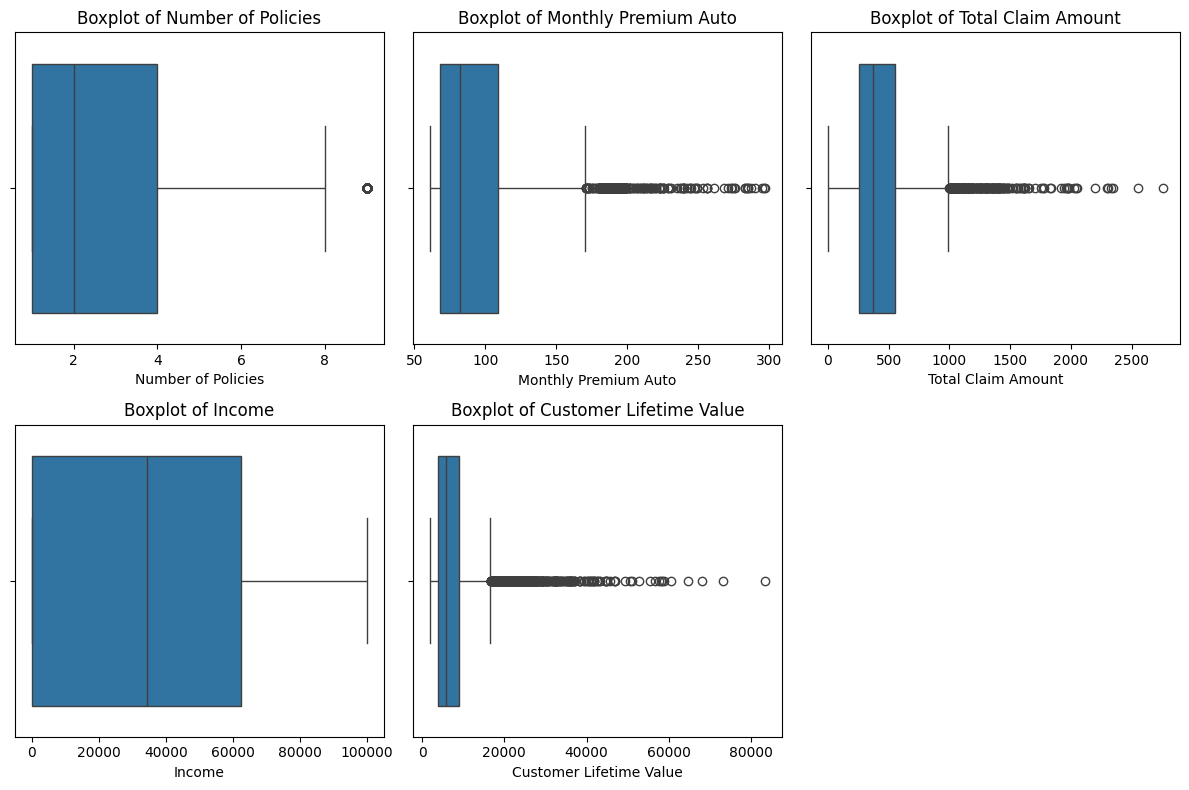

In [ ]:
#Check Outlier
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns) // 2 + 1, i)  # Adjust layout for multiple subplots
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


Karena data outlier banyak dengan jarak yang dekat, sehingga tidak diperlukan menghapus outlier

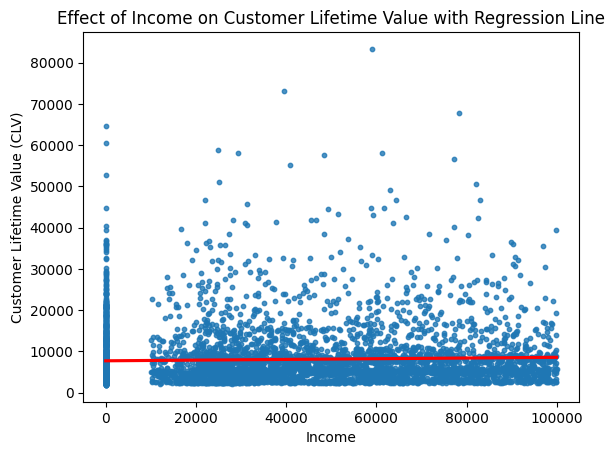

In [ ]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='Income', y='Customer Lifetime Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Effect of Income on Customer Lifetime Value with Regression Line')

# Show the plot
plt.show()


Tidak terlihat trend yang signifikan antara Income dengan CLV

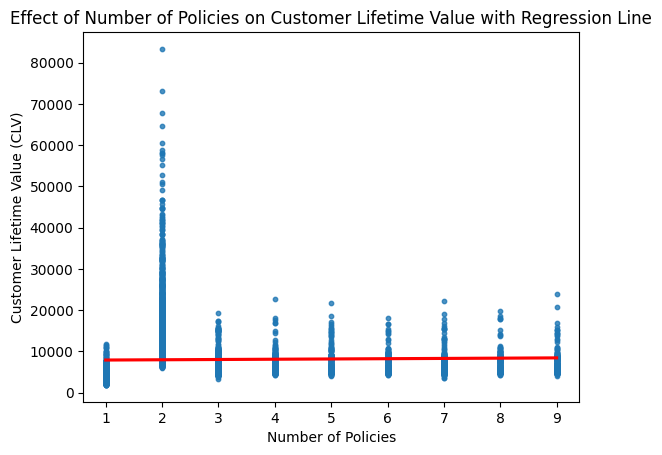

In [ ]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='Number of Policies', y='Customer Lifetime Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Number of Policies')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Effect of Number of Policies on Customer Lifetime Value with Regression Line')

# Show the plot
plt.show()

Tidak terlihat trend yang signifikan antara Number of Policies dengan CLV

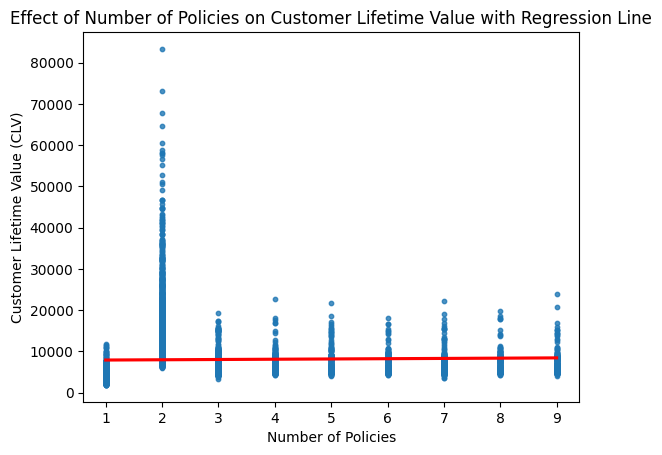

In [ ]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='Number of Policies', y='Customer Lifetime Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Number of Policies')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Effect of Number of Policies on Customer Lifetime Value with Regression Line')

# Show the plot
plt.show()

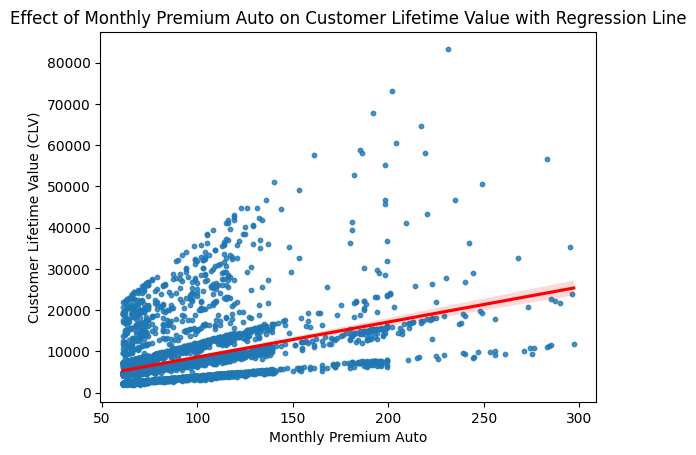

In [ ]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Effect of Monthly Premium Auto on Customer Lifetime Value with Regression Line')

# Show the plot
plt.show()

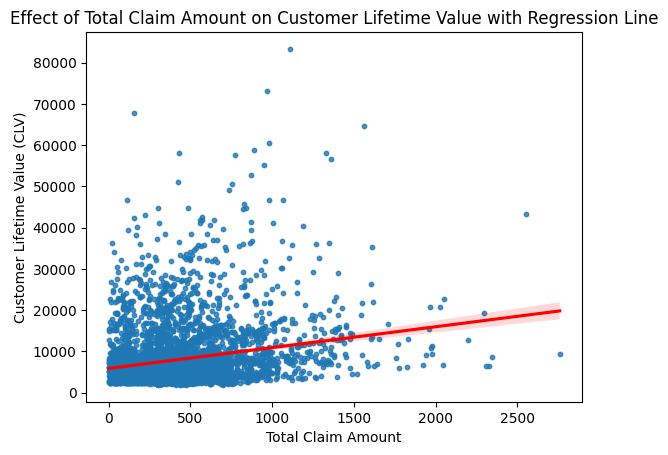

In [ ]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='Total Claim Amount', y='Customer Lifetime Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Effect of Total Claim Amount on Customer Lifetime Value with Regression Line')

# Show the plot
plt.show()

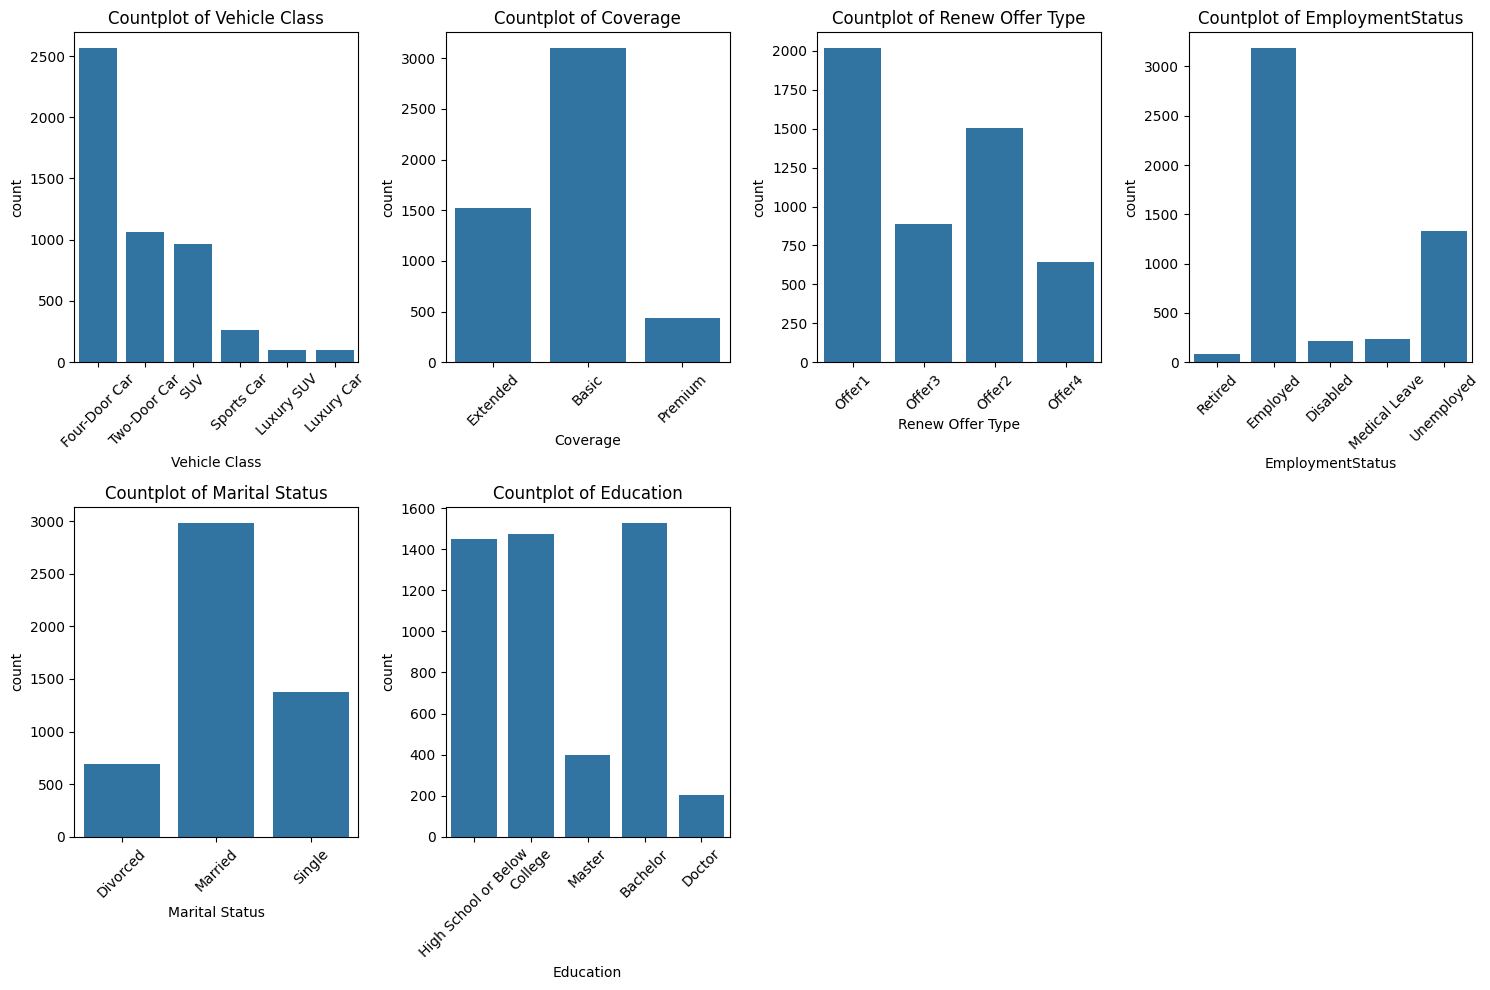

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Get the categorical columns (non-numeric)
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the plotting grid
plt.figure(figsize=(15, 10))

# Iterate over each categorical column and generate a countplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, len(categorical_columns) // 2 + 1, i)  # Adjust layout for multiple subplots
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

Encoding : 
- OneHot : 'Vehicle Class','Renew Offer Type','Marital Status'
- Ordinal : 'Coverage','EmploymentStatus','Education'

Scaling : 
- Robust : All Numerical Value

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame and 'CLV' is the column representing Customer Lifetime Value
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Set up the plotting grid
# plt.figure(figsize=(15, 10))

# # Iterate over each categorical column and generate a countplot with CLV as hue
# for i, col in enumerate(categorical_columns, 1):
#     plt.subplot(2, len(categorical_columns) // 2 + 1, i)  # Adjust layout for multiple subplots
#     sns.countplot(x=col, hue='Customer Lifetime Value', data=df)
#     plt.title(f'Countplot of {col} vs CLV', fontsize=10)  # Adjust fontsize to fit the space
#     plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#     plt.tight_layout()  # Adjust the layout to prevent overlap

# # Show the plot
# plt.show()


Secara Pola tidak dapat dilihat trendsnya jika dilihat dari visualisasinnya

In [ ]:
# Install xgboost if not already installed
#%pip install xgboost

# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
## Splitting 

In [ ]:
# Memisahkan data independen variabel dengan target
X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [ ]:
df.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [ ]:
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder

# Define ordinal mappings (as above)
coverage_levels = ['Basic','Extended','Premium']
education_levels = ['High School or Below','College','Bachelor','Master','Doctor']

transformer = ColumnTransformer([
    # One-Hot Encoding (nominal categories)
    ('OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Marital Status','EmploymentStatus']),
    
    # Ordinal Encoding (ordered categories)
    ('Education_Ordinal', OrdinalEncoder(categories=[education_levels]), ['Education']),
    ('Coverage_Ordinal', OrdinalEncoder(categories=[coverage_levels]), ['Coverage']),
    
    # Scaling (numeric features)
    ('Scaling', RobustScaler(), [
        'Number of Policies', 'Monthly Premium Auto', 
        'Total Claim Amount', 'Income'
    ])
], remainder='passthrough')

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'Marital Status', 'EmploymentStatus']),
                                ('Education_Ordinal',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor']]),
                                 ['Education']),
                                ('Coverage_Ordinal',
                                 OrdinalEncoder(categories=[['Basic',
                                                             'Extended',
                                                             'Premium']]),
                                 ['Coverage']),
                                ('Scaling', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

In [ ]:
transformer.fit_transform(X)

array([[ 0.        ,  0.        ,  0.        , ...,  0.19512195,
         0.66503026, -0.36006819],
       [ 0.        ,  0.        ,  0.        , ..., -0.48780488,
        -0.87696423,  0.1671162 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.48780488,
        -0.39531793, -0.20502149],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.65853659,
         0.50211438, -0.10475177],
       [ 0.        ,  0.        ,  0.        , ..., -0.48780488,
        -1.11227649,  0.80574342],
       [ 0.        ,  1.        ,  0.        , ...,  2.85365854,
        -0.71802445,  0.41398078]], shape=(5051, 20))

In [ ]:
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Define regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluation Metrics yang digunakan
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

for name, model in models.items():
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', RobustScaler()),
        ('algo', model)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

  File "c:\Users\A S U S\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\A S U S\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\A S U S\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
          

In [ ]:
cvresult_before_tuning = pd.DataFrame({
    'model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult_before_tuning

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-6261.693,328.998,-3843.468,171.372,-0.584,0.016
1,KNN,-6526.515,283.868,-3839.676,160.198,-0.557,0.016
2,Decision Tree,-5465.312,253.689,-2003.949,152.886,-0.147,0.009
3,Random Forest,-4214.649,107.414,-1699.809,58.556,-0.123,0.004
4,XGBoost,-4388.815,106.919,-2170.352,96.736,-0.224,0.015


Based on the provided metrics (RMSE, MAE, MAPE), Random Forest seems to be the best model. Here's why:

RMSE (Root Mean Squared Error): Lower values indicate better performance. Random Forest has the lowest RMSE (-4206.637).

MAE (Mean Absolute Error): Again, lower values are better. Random Forest has the lowest MAE (-1687.925).

MAPE (Mean Absolute Percentage Error): Lower values indicate more accurate predictions. Random Forest has the lowest MAPE (-0.122).

In summary, Random Forest outperforms the other models in all key metrics, making it the best choice in this case.

Random Forest dan XGBoost memiliki nilai RMSE, MAE, MAPE terbaik (paling rendah)

In [ ]:
## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'algo__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'algo__max_depth': [10, 20, 1],      # Maximum depth of the tree
    'algo__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'algo__min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'algo__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'algo__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Define the pipeline
pipe_model = Pipeline([
    ('prep', transformer),          # Data preprocessing step (e.g., scaling)
    ('scaler', RobustScaler()),     # Scaler
    ('algo', rf_model)              # The Random Forest model
])

# Define GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=pipe_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Scoring metric (RMSE)
    cv=5,  # 5-fold cross-validation
    verbose=2,  # To see detailed logs during the search
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

import pandas as pd

# Assuming the grid_search has already been fitted
# Collect the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Filter columns to show relevant information
results_filtered = results[['param_algo__n_estimators', 
                            'param_algo__max_depth', 
                            'param_algo__min_samples_split',
                            'param_algo__min_samples_leaf', 
                            'param_algo__max_features', 
                            'param_algo__bootstrap', 
                            'mean_test_score', 
                            'std_test_score', 
                            'rank_test_score']]

results = pd.DataFrame(grid_search.cv_results_)

# Filter columns to show relevant information
results_filtered = results[['param_algo__n_estimators', 
                            'param_algo__max_depth', 
                            'param_algo__min_samples_split',
                            'param_algo__min_samples_leaf', 
                            'param_algo__max_features', 
                            'param_algo__bootstrap', 
                            'mean_test_score', 
                            'std_test_score', 
                            'rank_test_score']]

# Display the results with a title
print("Hyperparameter Tuning Results")
display(results_filtered)  # Uses Jupyter's built-in display

# Sort the dataframe and show the top results
results_sorted = results_filtered.sort_values(by='rank_test_score')
print("\nTop Performing Hyperparameters:")
display(results_sorted.head())  # Display the top rows


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Hyperparameter Tuning Results


,param_algo__n_estimators,param_algo__max_depth,param_algo__min_samples_split,param_algo__min_samples_leaf,param_algo__max_features,param_algo__bootstrap,mean_test_score,std_test_score,rank_test_score
0,50,10,2,1,auto,True,NaN,NaN,325
1,100,10,2,1,auto,True,NaN,NaN,325
2,200,10,2,1,auto,True,NaN,NaN,325
3,50,10,5,1,auto,True,NaN,NaN,325
4,100,10,5,1,auto,True,NaN,NaN,325
...,...,...,...,...,...,...,...,...,...
481,100,1,5,4,log2,False,-6404.551500,351.476655,320
482,200,1,5,4,log2,False,-6389.546785,348.325518,308
483,50,1,10,4,log2,False,-6389.659579,377.406830,309
484,100,1,10,4,log2,False,-6383.991529,344.717018,297



Top Performing Hyperparameters:


,param_algo__n_estimators,param_algo__max_depth,param_algo__min_samples_split,param_algo__min_samples_leaf,param_algo__max_features,param_algo__bootstrap,mean_test_score,std_test_score,rank_test_score
115,100,20,10,1,sqrt,True,-4166.309064,256.516108,1
394,100,20,10,2,log2,False,-4170.618688,241.067008,2
368,200,20,10,2,sqrt,False,-4188.429402,261.686980,3
374,200,20,5,4,sqrt,False,-4189.550025,267.830326,4
385,100,20,10,1,log2,False,-4193.141822,249.052059,5


Setelah dilakukan Hyperparameter, model terbaik dengan konfigurasi :
n estimator = 200
max depth = none
min sample split = 5
min sample leaf = 1
max features = log2
bootstrap = True

dengan 
Mean = -4175
std = 251

In [ ]:
# Mendapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_

# Melakukan prediksi pada data
# Pastikan data yang akan diprediksi sudah dalam format yang sama dengan data training
y_pred = best_model.predict(X_test)  # Ganti X_test dengan data baru yang ingin diprediksi

# (Opsional) Evaluasi model
from sklearn.metrics import mean_squared_error, r2_score

print("Best Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

# (Opsional) Menyimpan hasil prediksi
pd.DataFrame(y_pred, columns=['Predicted']).to_csv('best_model_predictions.csv', index=False)

# (Opsional) Menyimpan model terbaik
import joblib
joblib.dump(best_model, 'best_rf_pipeline_model.pkl')

Best Model Performance:
RMSE: 4505.3783576705855
R-squared: 0.6181186451461803


['best_rf_pipeline_model.pkl']

In [ ]:
# install streamlit if not already installed
%pip install streamlit

# upload ke streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Judul aplikasi
st.title('🦉 Random Forest Prediction App')
st.write("""
## Prediksi Menggunakan Model Random Forest Terbaik
Upload data Anda dalam format CSV untuk melakukan prediksi
""")

# Sidebar untuk upload file
st.sidebar.header('1. Upload Data CSV')
uploaded_file = st.sidebar.file_uploader(
    "Upload file CSV Anda", 
    type=["csv"],
    help="Pastikan format sesuai dengan data training"
)

# Load model
@st.cache_resource
def load_model():
    try:
        model = joblib.load('best_rf_pipeline_model.pkl')
        return model
    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        return None

model = load_model()

# Jika model berhasil diload
if model is not None:
    # Tampilkan parameter model terbaik
    st.sidebar.header('2. Model Information')
    st.sidebar.subheader('Hyperparameter Terbaik')
    st.sidebar.write(model.named_steps['algo'].get_params())
    
    # Jika ada file yang diupload
    if uploaded_file is not None:
        try:
            # Baca data
            df = pd.read_csv(uploaded_file)
            
            # Tampilkan preview data
            st.header('Data Preview')
            st.write(f"Shape: {df.shape}")
            st.dataframe(df.head())
            
            # Button untuk prediksi
            if st.button('Lakukan Prediksi'):
                # Lakukan prediksi
                predictions = model.predict(df)
                
                # Tampilkan hasil
                st.success('Prediksi Berhasil!')
                
                # Buat dataframe hasil
                results = pd.DataFrame({
                    'Prediksi': predictions,
                })
                
                # Tampilkan hasil
                st.header('Hasil Prediksi')
                st.dataframe(results)
                
                # Download hasil
                csv = results.to_csv(index=False).encode('utf-8')
                st.download_button(
                    label="Download Hasil Prediksi",
                    data=csv,
                    file_name='hasil_prediksi.csv',
                    mime='text/csv'
                )
                
                # Visualisasi (jika ada data aktual)
                if 'target' in df.columns:
                    st.header('Evaluasi Model')
                    actual = df['target']
                    
                    col1, col2 = st.columns(2)
                    with col1:
                        st.metric("RMSE", 
                                  np.round(np.sqrt(mean_squared_error(actual, predictions)), 2))
                    with col2:
                        st.metric("R-squared", 
                                  np.round(r2_score(actual, predictions), 2))
                    
                    # Plot aktual vs prediksi
                    chart_data = pd.DataFrame({
                        'Aktual': actual,
                        'Prediksi': predictions
                    })
                    st.line_chart(chart_data)
        
        except Exception as e:
            st.error(f"Error processing file: {str(e)}")

# Jika model tidak ditemukan
else:
    st.warning("Model tidak dapat ditemukan. Pastikan file model tersedia!")

# Petunjuk penggunaan
st.sidebar.header('Petunjuk Penggunaan')
st.sidebar.markdown("""
1. Upload data CSV Anda
2. Pastikan format data sesuai dengan data training
3. Klik tombol 'Lakukan Prediksi'
4. Download hasil prediksi
""")

# Catatan preprocessing
st.sidebar.header('Catatan Penting')
st.sidebar.markdown("""
- Pastikan data sudah melalui preprocessing yang sama dengan data training
- Kolom fitur harus sama dengan data training
- Format numerik dan kategorikal harus konsisten
""")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
2025-05-21 21:06:55.221 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 21:06:55.859 
  command:

    streamlit run C:\Users\A S U S\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-21 21:06:55.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 21:06:55.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 21:06:55.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 21:06:55.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 21:06:55.863 T

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

Conclusion : 
Estimasi Kesalahan dalam Konteks Keuangan:
RMSE memberikan gambaran langsung tentang seberapa jauh prediksi CLV menyimpang dari nilai sebenarnya. Misalnya, RMSE Rp400.000 berarti prediksi model meleset rata-rata Rp400.000 per pelanggan—informasi krusial untuk mengambil keputusan anggaran atau strategi retensi.

Peringatan untuk Prediksi Ekstrem:
RMSE sangat sensitif terhadap kesalahan besar (misalnya pada pelanggan bernilai CLV sangat tinggi/rendah). Ini penting karena kesalahan prediksi pada segmen ekstrem bisa berdampak besar pada profitabilitas.

Panduan Optimasi Model:
Algoritma regresi seperti Gradient Boosting menggunakan RMSE sebagai acuan untuk mengurangi kesalahan selama pelatihan model.

Relevansi untuk Bisnis Anda

Evaluasi Kecukupan Fitur:
R-Squared membantu menilai apakah faktor yang digunakan (misal: jenis asuransi, pendapatan) sudah cukup untuk memprediksi CLV. Jika R-Squared rendah (misal 0.3), artinya ada faktor lain (seperti loyalitas atau usia kendaraan) yang perlu ditambahkan.

Pembandingan Model:
Metrik ini memudahkan memilih algoritma terbaik. Misalnya, jika Random Forest memiliki R-Squared 0.8 sedangkan Linear Regression 0.6, Random Forest lebih mampu menangkap pola data.

Deteksi Masalah Model:
R-Squared terlalu tinggi (misal >0.95) bisa indikasi overfitting (model terlalu kompleks), sedangkan nilai rendah (<0.5) menunjukkan model terlalu sederhana atau fitur kurang relevan.


Rekomendasi untuk Perusahaan Anda
Utamakan RMSE sebagai tolok ukur utama karena terkait langsung dengan dampak finansial prediksi.

Manfaatkan R-Squared untuk audit kualitas fitur. Jika nilainya di bawah 0.6, lakukan:

Eksplorasi fitur baru, seperti riwayat klaim atau frekuensi pembaruan polis.

Transformasi data, misalnya mengelompokkan pendapatan ke dalam kategori atau menangani outlier CLV.

Integrasikan dengan Logika Bisnis:

Tetapkan batas toleransi RMSE berdasarkan risiko finansial (misalnya: RMSE maksimal 10% dari rata-rata CLV).

Gunakan R-Squared untuk memprioritaskan pengumpulan data tambahan (misalnya: survei kepuasan pelanggan).

Dengan memadukan RMSE dan R-Squared, perusahaan tidak hanya mengevaluasi kinerja model secara statistik, tetapi juga memastikan solusi selaras dengan kebutuhan bisnis.

